In [14]:
# Deep Learning – CNN Image Classification with Keras
# Modified by Tom DiGuido
# Based on tutorial by Joseph Lee (Intuitive Deep Learning)
# Dataset: CIFAR-10 built-in dataset, plus test images (cat.jpg, cat2.jpg)

In [15]:
# !pip install tensorflow matplotlib numpy pillow

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [17]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0-255 ➜ 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [18]:
from tensorflow.keras import Input

model = models.Sequential([
    Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=64,
                    verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4137 - loss: 1.6065 - val_accuracy: 0.5230 - val_loss: 1.3447
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5626 - loss: 1.2311 - val_accuracy: 0.5887 - val_loss: 1.1629
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6192 - loss: 1.0847 - val_accuracy: 0.6127 - val_loss: 1.1074
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6567 - loss: 0.9880 - val_accuracy: 0.6626 - val_loss: 0.9599
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6778 - loss: 0.9235 - val_accuracy: 0.6580 - val_loss: 0.9805
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6987 - loss: 0.8655 - val_accuracy: 0.6798 - val_loss: 0.9174
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7176 - loss: 0.8098 - val_accuracy: 0.6820 - val_loss: 0.9164
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7305 - loss: 0.7721 - val_accurac

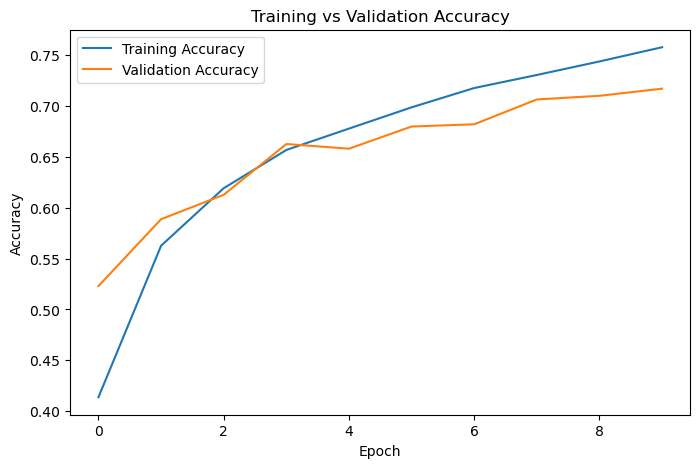

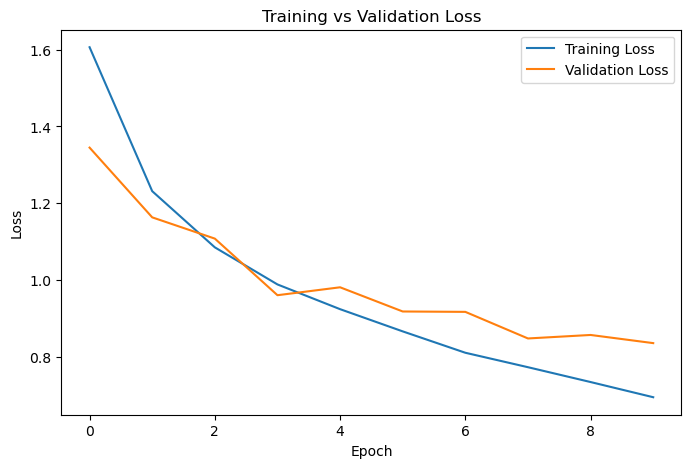

In [26]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
model.save("my_cifar10_model.keras")
print(" Model saved as my_cifar10_model.keras")

 Model saved as my_cifar10_model.keras


In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f" Test Accuracy: {test_acc:.3f}")

313/313 - 1s - 3ms/step - accuracy: 0.7170 - loss: 0.8349
 Test Accuracy: 0.717


In [29]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_custom(img_path):
    img = image.load_img(img_path, target_size=(32,32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    print(f"{img_path} → {predicted_class} ({confidence:.2f} confidence)")

predict_custom("cat.jpg")
predict_custom("cat2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
cat.jpg → dog (0.62 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
cat2.jpg → truck (0.91 confidence)


In [31]:
print(" CNN training complete.")
print("Model and predictions executed successfully.")

 CNN training complete.
Model and predictions executed successfully.
